In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier


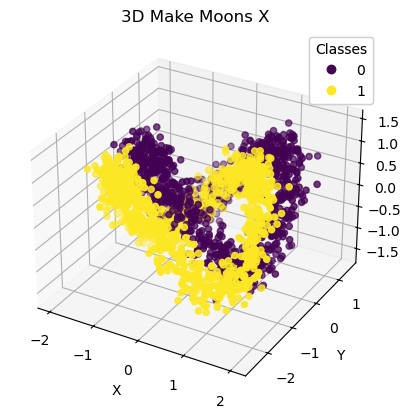

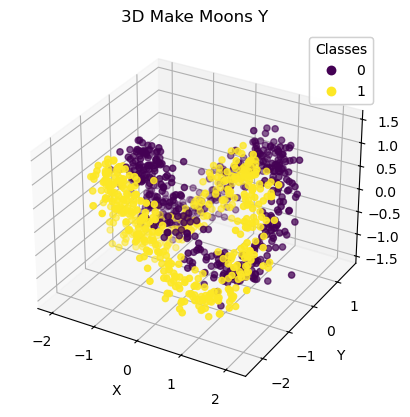

In [2]:
#生成训练集与测试集
def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# Generate the data (1000 datapoints)
X, X_labels = make_moons_3d(n_samples=1000, noise=0.2)
Y, Y_labels = make_moons_3d(n_samples=500, noise=0.2)
# Plotting for X
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X_labels, cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons X')
plt.show()
# Plotting for Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
satter = ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=Y_labels, cmap='viridis', marker='o')
legend2 = ax.legend(*satter.legend_elements(), title="Classes")
ax.add_artist(legend2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons Y')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.97


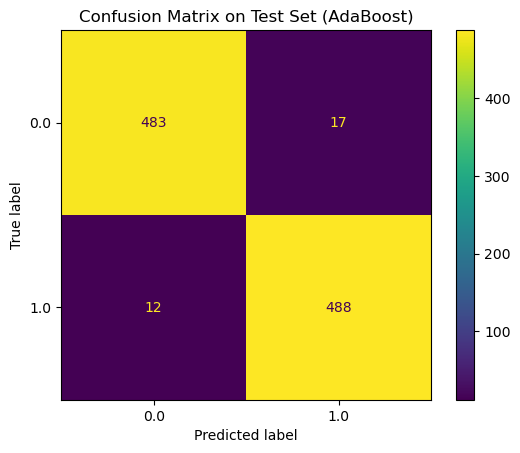

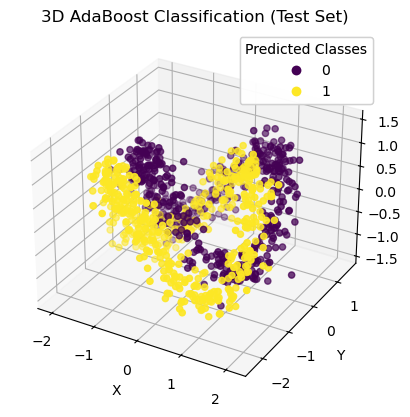

In [3]:
base_clf = DecisionTreeClassifier(max_depth=4, random_state=42) #weak classifier
adaboost_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=100, random_state=42) #adaboost
adaboost_clf.fit(X, X_labels) #training model
Y_pred = adaboost_clf.predict(Y) #predict
# accuracy
accuracy = accuracy_score(Y_labels, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 打印混淆矩阵
cm = confusion_matrix(Y_labels, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost_clf.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix on Test Set (AdaBoost)")
plt.show()

# 可视化测试集分类结果
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=Y_pred, cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Predicted Classes")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D AdaBoost Classification (Test Set)')
plt.show()